In [1]:
import pandas as pd
import numpy as np
from io import StringIO
import numpy.linalg as la
import matplotlib.pyplot as plt
from matplotlib import cm as cm
import seaborn as sns
sns.set(font_scale=2)
plt.style.use('seaborn-whitegrid')
%matplotlib inline

In [2]:
params = ["radius", "texture", "perimeter", "area",
          "smoothness", "compactness", "concavity",
          "concave points", "symmetry", "fractal dimension"];
stats = ["(mean)", "(stderr)", "(worst)"]
labels = ["patient ID", "Malignant/Benign"]

for p in params:
    for s in stats:
        labels.append(p + " " + s)

tumor_data = pd.io.parsers.read_csv("breast-cancer-train.dat",header=None,names=labels)

features = tumor_data[labels[2:]]

features.head()

,radius (mean),radius (stderr),radius (worst),texture (mean),texture (stderr),texture (worst),perimeter (mean),perimeter (stderr),perimeter (worst),area (mean),...,concavity (worst),concave points (mean),concave points (stderr),concave points (worst),symmetry (mean),symmetry (stderr),symmetry (worst),fractal dimension (mean),fractal dimension (stderr),fractal dimension (worst)
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
mean_label = [labels[1]] + labels[2::3] 
print(mean_label)

['Malignant/Benign', 'radius (mean)', 'texture (mean)', 'perimeter (mean)', 'area (mean)', 'smoothness (mean)', 'compactness (mean)', 'concavity (mean)', 'concave points (mean)', 'symmetry (mean)', 'fractal dimension (mean)']


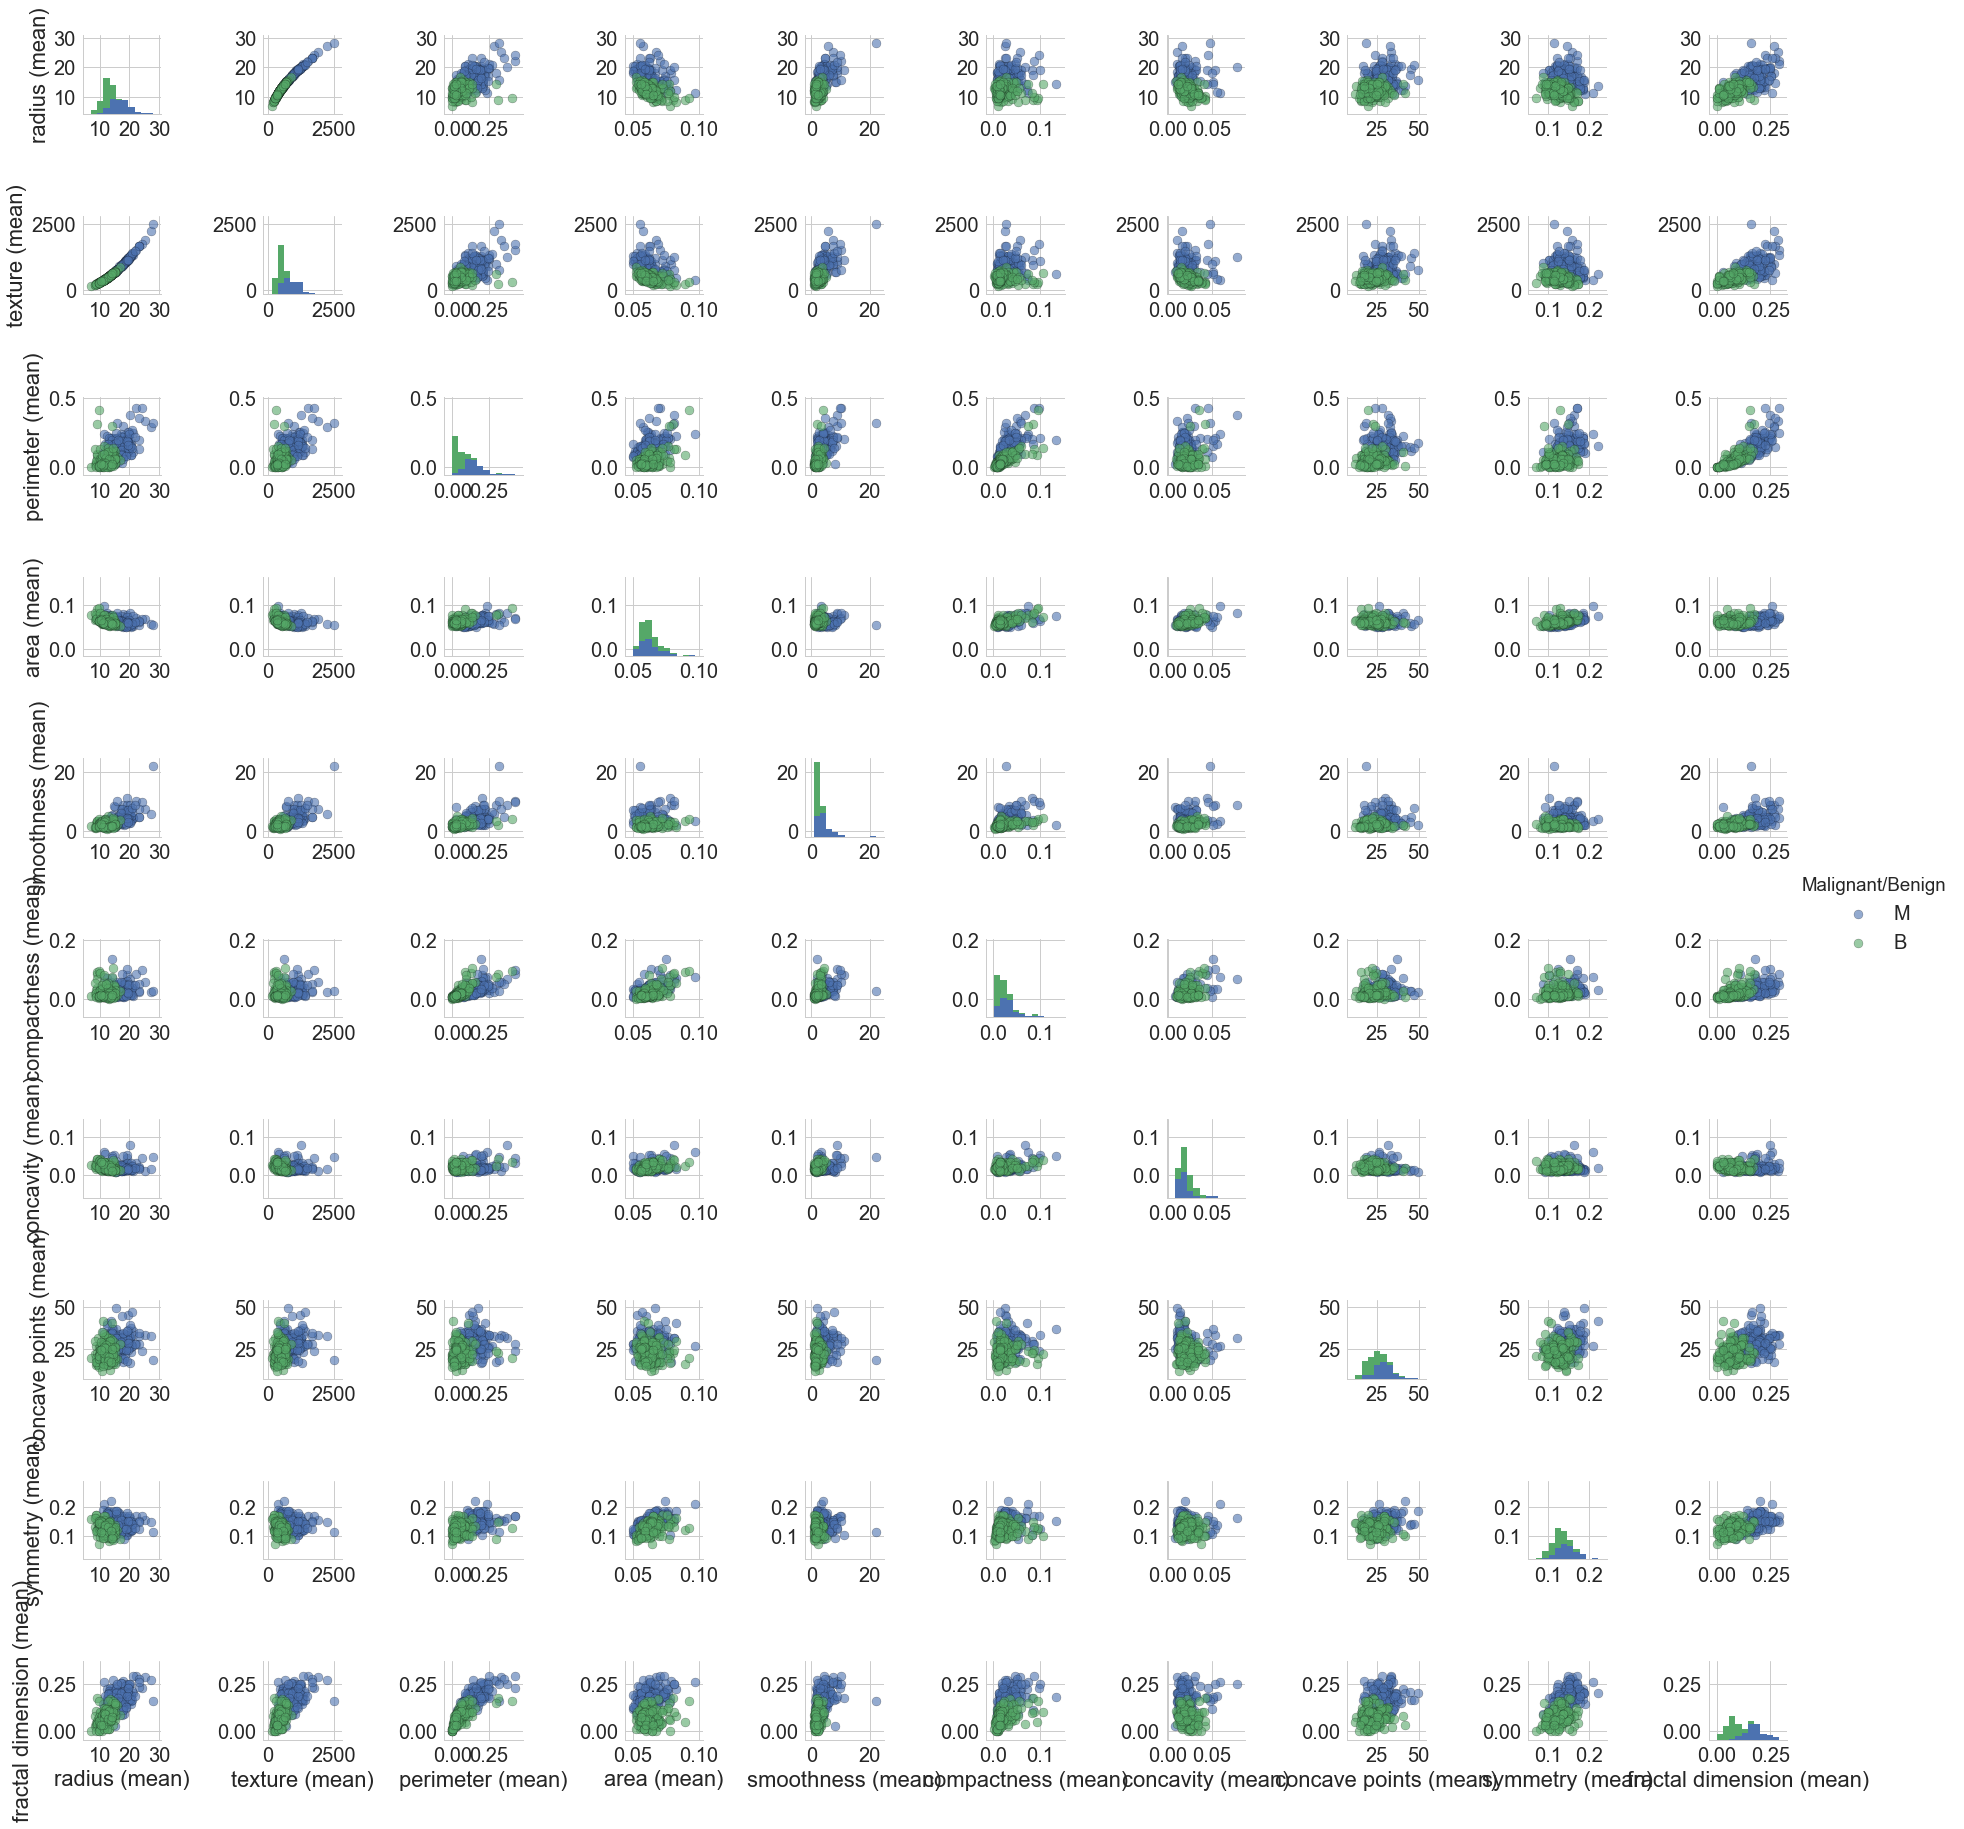

In [4]:
sns.pairplot(tumor_data[mean_label], hue="Malignant/Benign", plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'})

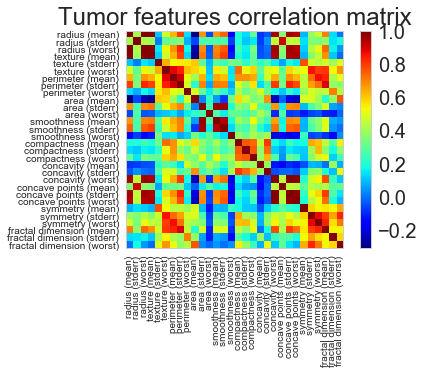

In [5]:
corr_matrix = features.corr()
# plot correlation matrix
fig = plt.figure()
ax1 = fig.add_subplot(111)
cax = ax1.imshow(corr_matrix, cmap=cm.get_cmap('jet'))
plt.title('Tumor features correlation matrix')
plt.grid('off')
ax1.set_xticks(np.arange(features.shape[1]))
ax1.set_yticks(np.arange(features.shape[1]))
ax1.set_xticklabels(labels[2:],fontsize=10,rotation=90)
ax1.set_yticklabels(labels[2:],fontsize=10)
fig.colorbar(cax)

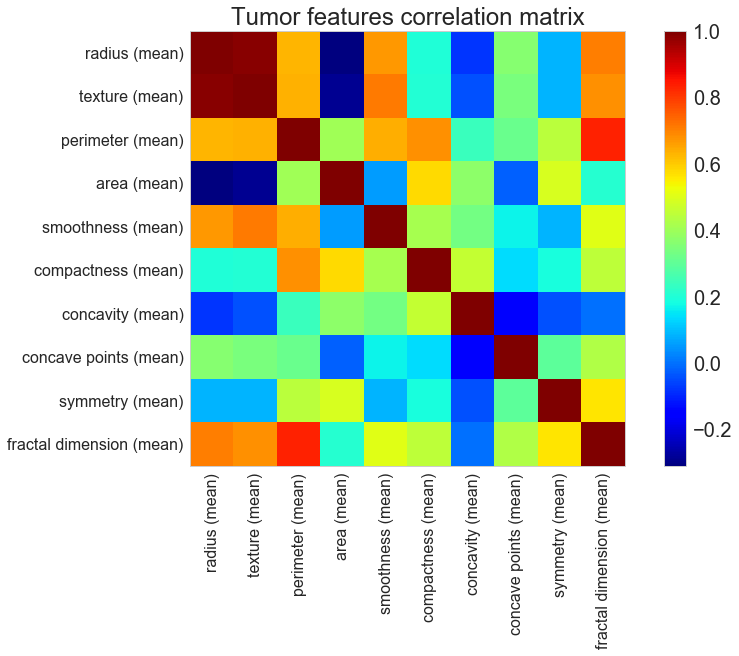

In [6]:
fig = plt.figure(figsize = (14,8))
ax1 = fig.add_subplot(111)
cax = ax1.imshow(tumor_data[mean_label[1:]].corr(), cmap=cm.get_cmap('jet'))
plt.title('Tumor features correlation matrix')
plt.grid('off')
ax1.set_xticks(np.arange(len(mean_label[1:])))
ax1.set_yticks(np.arange(len(mean_label[1:])))
ax1.set_xticklabels(mean_label[1:],fontsize=16,rotation=90)
ax1.set_yticklabels(mean_label[1:],fontsize=16)
fig.colorbar(cax)

In [7]:
X = (features - features.mean())/features.std()

U, S, Vt = np.linalg.svd(X, full_matrices=False)

variances = S**2

V = Vt.T

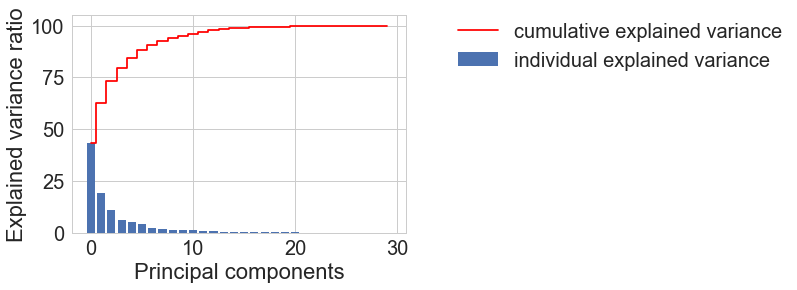

In [8]:
tot = sum(variances)
var_exp = [(i / tot)*100 for i in variances]
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(len(var_exp)),var_exp, align='center', label='individual explained variance')
plt.step(range(len(var_exp)), cum_var_exp, 'r', where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(bbox_to_anchor=(1.1, 1.05))

In [9]:
cum_var_exp

array([  43.39946344,   62.59238425,   73.40687734,   79.43377319,
         84.38534142,   88.44267647,   90.70202752,   92.40314689,
         93.81109327,   95.00733279,   96.09327633,   96.94979856,
         97.76955554,   98.28341965,   98.62610703,   98.9147503 ,
         99.12033911,   99.31807613,   99.46078286,   99.57431509,
         99.67744567,   99.76450833,   99.83132474,   99.89027957,
         99.93992972,   99.96606966,   99.99033414,   99.99631036,
         99.99951529,  100.        ])

In [10]:
k = 6
Xstar=X@V[:,:k]
tumor_pca_data = tumor_data[labels[:2]].copy()
pca_labels = []
for i in range(k):
    lab = 'p'+str(i)
    pca_labels += [lab]
    tumor_pca_data[lab] = Xstar[:,i]  

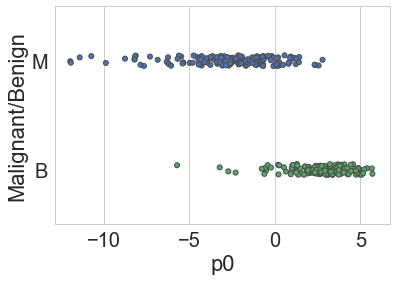

In [11]:
sns.stripplot(x="p0",y="Malignant/Benign", data=tumor_pca_data, jitter=0.05, linewidth=1)

In [12]:
def plot_arrow(vector,scale,text_label,text_posx,text_posy):
    plt.arrow(0, 0, scale*vector[0], scale*vector[1], head_width=0.1, head_length=0.1, fc='r', ec='r', lw=5)
    plt.text(scale*vector[0]*text_posx, scale*vector[1]*text_posy, text_label , color='black', ha='center', va='center', fontsize=18)

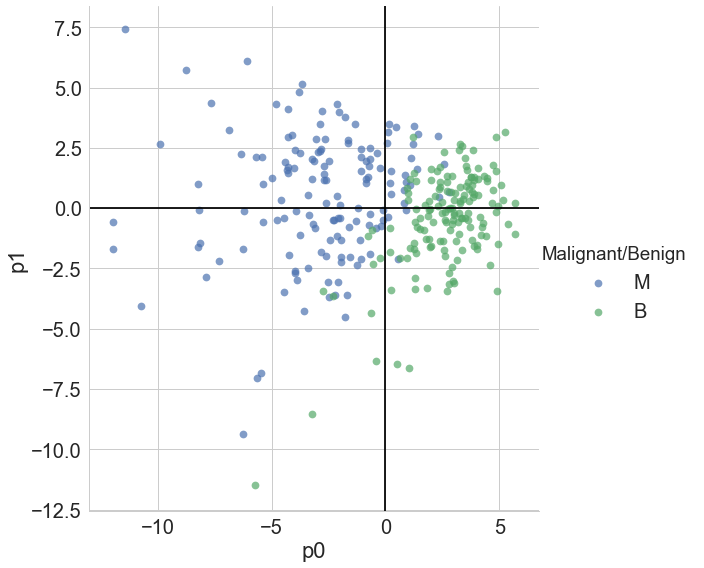

In [13]:
g1 = sns.lmplot('p0', 'p1', tumor_pca_data, hue='Malignant/Benign', fit_reg=False, size=8, scatter_kws={'alpha':0.7,'s':60})

ax = g1.axes[0,0]
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')


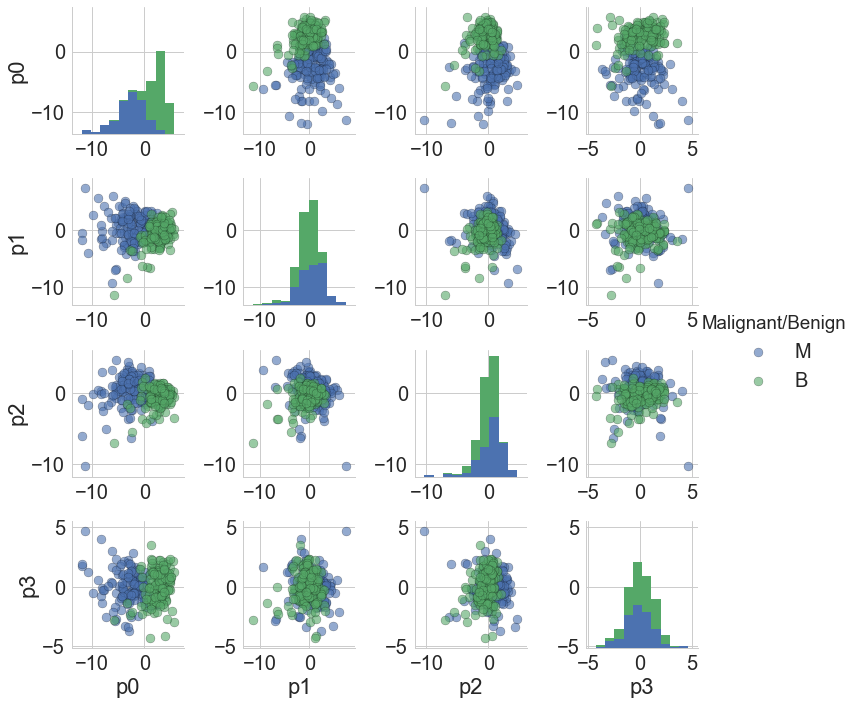

In [14]:
labelset = ['Malignant/Benign','p0', 'p1','p2','p3']
sns.pairplot(tumor_pca_data[labelset],hue='Malignant/Benign', plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'})

Text(0.5,1,'influence of original features in p0')

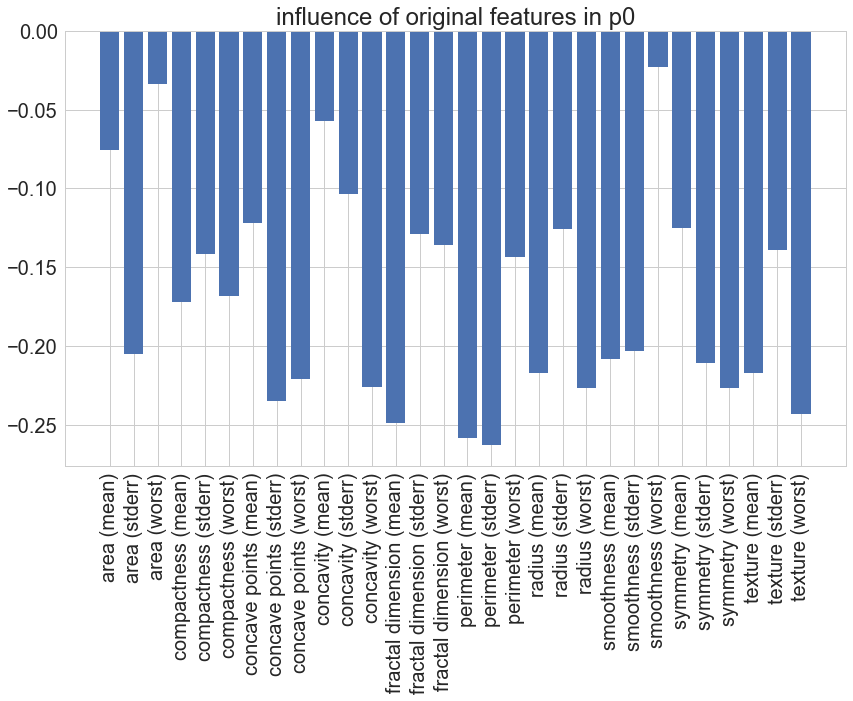

In [15]:
plt.subplots(figsize = (14,8))
plt.bar(labels[2:],V[:,0])
plt.xticks(rotation=90)
plt.title('influence of original features in p0')